# Tutorial: Using a MoGP Reference Model to make ALSFRS-R predictions on new datasets

This notebook describes how to use a refrence model to predict cluster membership and forcast ALSFRS-R scores.
The reference model was trained on ALSFRS-R scores from [PRO-ACT](https://nctu.partners.org/proact), which is a large database for aggregated ALS clinical trial data.

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [2]:
import mogp 
import numpy as np
import joblib
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

## Load Reference Model

**Downloading model**: The reference model can be downloaded from: [http://fraenkel.mit.edu/mogp/](http://fraenkel.mit.edu/mogp/)

In [3]:
path_to_reference = Path('mogp_reference_model.pkl')
reference_model = joblib.load(path_to_reference)

## Input new ALSFRS-R data

**Xi** (np.array): Time since symptom onset (in years) between symtom onset date and date of ALSFRS-R measurement (length: # time points)   
**Yi** (np.array): ALSFRS-R measurements, corresponding to Xi (length: # time points)   

The size of **Xi** and **Yi** should be identical.

In [4]:
Xi_new = np.array([0.25, 0.5, 1, 2.4])
Yi_new = np.array([46, 44, 41, 19])

## Predict Trajectory Cluster Membership

```mogp.rank_cluster_prediction(model, x_new, y_new)``` can be used to predict trajectory cluster membership for new data 

**Arguments**:
- **model** (mogp.MoGP_constrained): model to use for cluster prediction
- **x_new** (np.array): explanatory variable (time since symptom onset) for new patient (length: # time points)   
- **y_new** (np.array): responses (clinical scores) for new patient (length: # time points) 

**Returns:**  
-  **rank_cluster** (np.array): sorted array with most likely cluster prediction first
- **cluster_ll** (np.array): corresponding log likelihoods for clusters in rank_cluster

In [5]:
cluster_list, cluster_ll = mogp.utils.rank_cluster_prediction(reference_model, Xi_new, Yi_new)

In [6]:
cur_clust = cluster_list[0] # Select most likely cluster (first cluster in ranked list)

### Plot predicted trajectory cluster with new data

Plot original input data, with the Gaussian Process mean and confidence interval of its predicted trajectory cluster

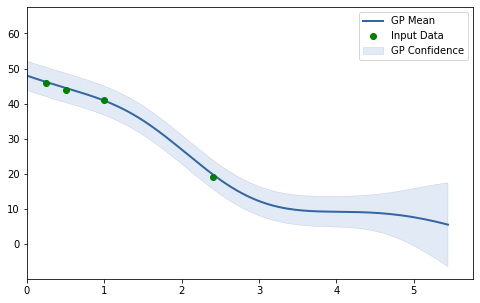

In [7]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot GP model for selected cluster
_ = reference_model.obsmodel[cur_clust].model.plot_confidence(ax=ax, label='GP Confidence')
_ = reference_model.obsmodel[cur_clust].model.plot_mean(ax=ax, label='GP Mean')

# Plot input new data
_ = ax.plot(Xi_new, Yi_new, 'o', color='g', label='Input Data')

# Format plot
_ = ax.set_xlim(0)
_ = ax.legend()

## Forecast future ALSFRS-R scores

The GP regression model trained by MoGP can be used to predict future ALSFRS-R scores.  
Prediction is done using GPy's [predict](https://gpy.readthedocs.io/en/deploy/GPy.core.html) function, which returns the mean and variance of the prediction 

In [8]:
x_pred = np.array([3, 4.25, 5])

In [9]:
# Calculate predicted y values
y_pred_mean, y_pred_std = reference_model.obsmodel[cur_clust].model.predict(x_pred.reshape(-1, 1))

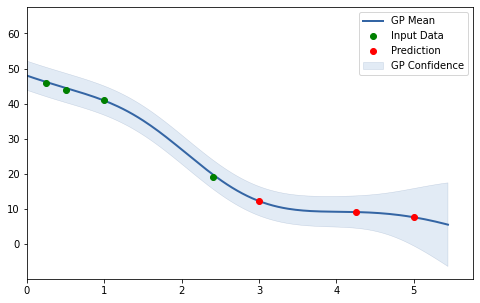

In [10]:
# Plot forecasted values
fig, ax = plt.subplots(figsize=(8,5))

# Plot GP model for selected cluster
_ = reference_model.obsmodel[cur_clust].model.plot_confidence(ax=ax, label='GP Confidence')
_ = reference_model.obsmodel[cur_clust].model.plot_mean(ax=ax, label='GP Mean')

# Plot input new data
_ = ax.plot(Xi_new, Yi_new, 'o', color='g', label='Input Data')

# Add forecasted data
_ = ax.plot(x_pred, y_pred_mean, 'o', color='r', label='Prediction')

# Format plot
_ = ax.set_xlim(0)
_ = ax.legend()